### Melbourne Home Data Analysis (Price Prediction)
#### Written by Ilesanmi Oluwasijibomi
 Home price prediction module entirely written with Python programming langueage on the Jupyter notebook

In [947]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

 The data was downloaded from Kaggle.com ()

In [948]:
melb_data_path='desktop/melb_data.csv'
melbdata= pd.read_csv(melb_data_path)

In [949]:
melbdata.head(4)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,1.0,156,79.0,1900.0,Yarra,-37.808,144.993,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,1.0,134,150.0,1900.0,Yarra,-37.809,144.994,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,4019


Lets get a brief statistical Desrciption of the dataset

In [950]:
melbdata.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13571.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.019158,558.416127,151.967650,1964.684217,-37.809238,144.995249,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.202966,3990.669241,541.014538,37.273762,0.079261,0.103915,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.183000,144.432000,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.857000,144.930000,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,1.000000,440.000000,126.000000,1970.000000,-37.802000,145.000000,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,1.000000,651.000000,174.000000,1999.000000,-37.756000,145.058000,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.409000,145.526000,21650.000000


i honestly dont understand the Price variables

In [951]:
pricestats=melbdata['Price'].describe().copy()
pricestats = pricestats.astype('int')
pricestats

count      13580
mean     1075684
std       639310
min        85000
25%       650000
50%       903000
75%      1330000
max      9000000
Name: Price, dtype: int32

### Lets visualize our data and get some insights:

Text(0.5, 1.0, 'Plot of Price and Rooms ')

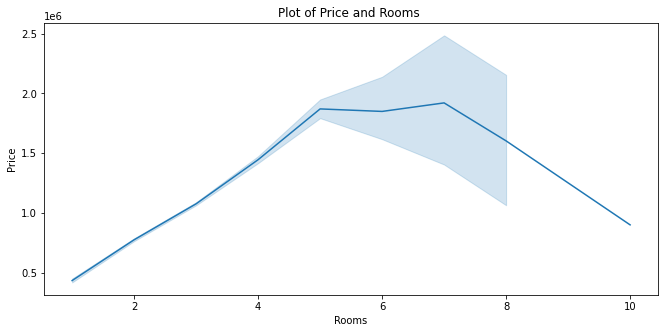

In [952]:
plt.figure(figsize=(11,5))
sns.lineplot(x=melbdata["Rooms"],y=melbdata["Price"])
plt.title("Plot of Price and Rooms ")


Text(0.5, 1.0, 'Plot of Price and Bathroom')

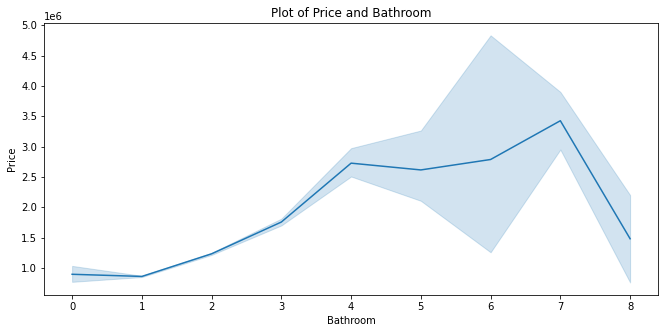

In [953]:
plt.figure(figsize=(11,5))
sns.lineplot(x=melbdata["Bathroom"],y=melbdata["Price"])
plt.title("Plot of Price and Bathroom")

Text(0.5, 1.0, 'Plot of Price and Type')

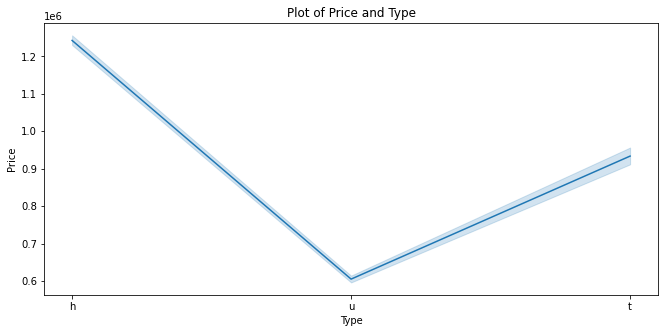

In [954]:
plt.figure(figsize=(11,5))
sns.lineplot(x=melbdata["Type"],y=melbdata["Price"])
plt.title("Plot of Price and Type")

Text(0.5, 1.0, 'Plot of Price and Bedroom')

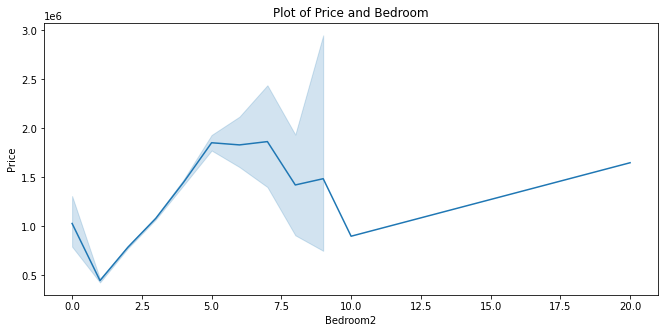

In [955]:
plt.figure(figsize=(11,5))
sns.lineplot(x=melbdata["Bedroom2"],y=melbdata["Price"])
plt.title("Plot of Price and Bedroom")

Text(0.5, 1.0, 'Plot of Price and Car')

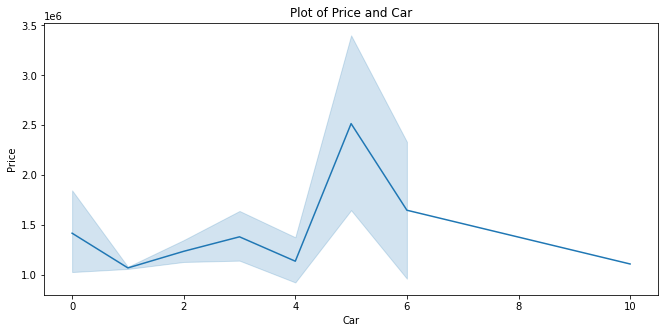

In [956]:
plt.figure(figsize=(11,5))
sns.lineplot(x=melbdata["Car"],y=melbdata["Price"])
plt.title("Plot of Price and Car")    

Text(0.5, 1.0, 'Plot of Price and Method')

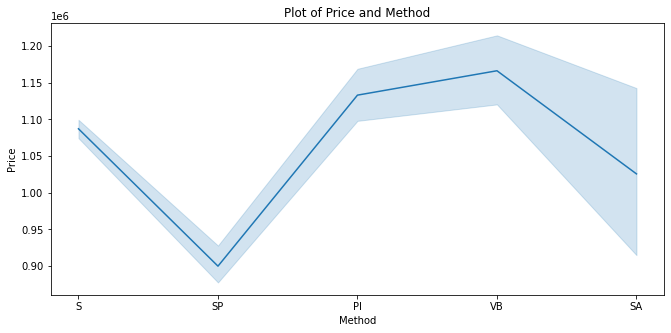

In [957]:
plt.figure(figsize=(11,5))
sns.lineplot(x=melbdata["Method"],y=melbdata["Price"])
plt.title("Plot of Price and Method") 

Text(0.5, 1.0, 'barplot of Price and Regionname ')

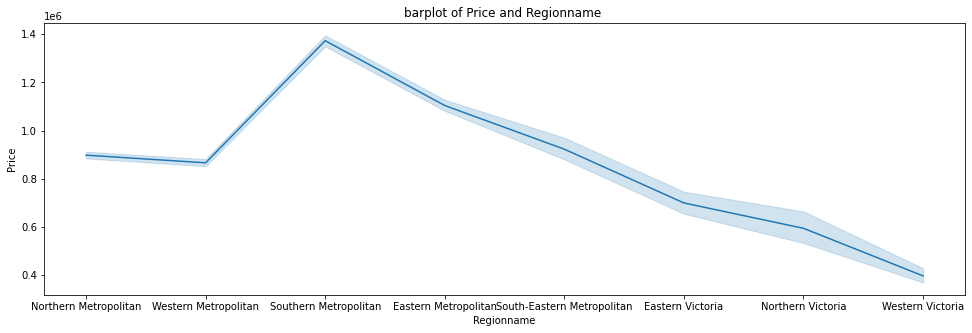

In [958]:
plt.figure(figsize=(16.5,5))
sns.lineplot(x=melbdata["Regionname"],y=melbdata["Price"])
plt.title("barplot of Price and Regionname ")

Text(0.5, 1.0, 'barplot of Price and Landsize')

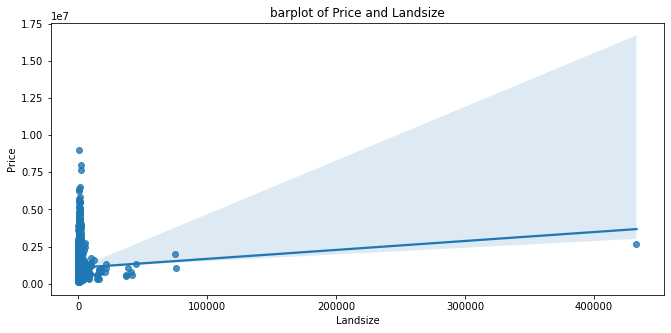

In [959]:
plt.figure(figsize=(11,5))
sns.regplot(x=melbdata["Landsize"],y=melbdata["Price"])
plt.title("barplot of Price and Landsize")

This graph has a suspected invalid variable which is the landsize that is greater than 400000.
Let us get the price of the record with this landsize

In [960]:
melbdata.loc[melbdata["Landsize"] > 400000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11020,Fitzroy,389 Gore St,3,h,2700000,VB,Kay,12/8/2017,2.1,3065,...,3,1.0,433014,NaN,NaN,Yarra,-37.798,144.983,Northern Metropolitan,5825


Let us drop the row and see if that has significant changes

Text(0.5, 1.0, 'barplot of Price and Landsize')

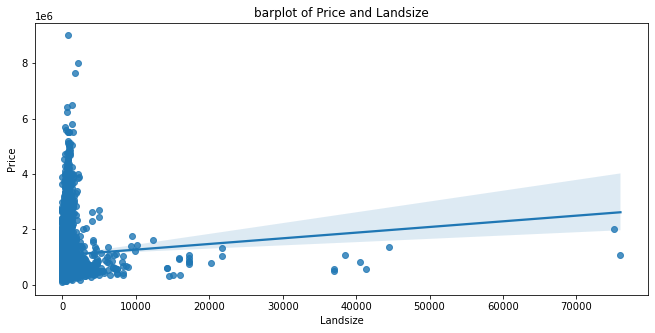

In [961]:
x = [11020 ]
melbdatalandsize = melbdata.drop(x,axis=0)
plt.figure(figsize=(11,5))
sns.regplot(x=melbdatalandsize["Landsize"],y=melbdatalandsize["Price"])
plt.title("barplot of Price and Landsize")

Text(0.5, 1.0, 'barplot of Price and BuildingArea')

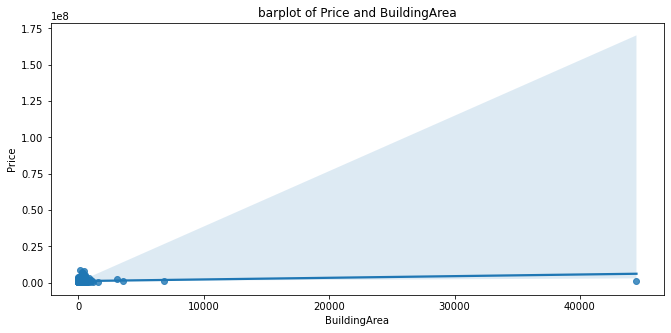

In [962]:
plt.figure(figsize=(11,5))
sns.regplot(x=melbdata["BuildingArea"],y=melbdata["Price"])
plt.title("barplot of Price and BuildingArea")

This graph too has a variable that is suspected to be invalid

In [963]:
x = (melbdata.loc[melbdata["BuildingArea"] > 2000])
x

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1484,Bulleen,19 Warringal St,4,h,1280000,S,Barry,11/3/2017,11.8,3105,...,1,1.0,732,6791.0,NaN,Manningham,-37.762,145.090,Eastern Metropolitan,4480
1588,Camberwell,46 Athelstan Rd,5,h,2608000,S,Marshall,15/10/2016,7.8,3124,...,2,1.0,730,3112.0,1920.0,Boroondara,-37.842,145.064,Southern Metropolitan,8920
2560,Fitzroy North,186 Queens Pde,2,t,930000,S,Nelson,3/9/2016,3.5,3068,...,3,1.0,2778,3558.0,NaN,Yarra,-37.790,144.986,Northern Metropolitan,6244
13245,New Gisborne,71 Hamilton Rd,5,h,1355000,S,Raine,23/09/2017,48.1,3438,...,3,1.0,44500,44515.0,NaN,NaN,-37.454,144.589,Northern Victoria,849



Let us drop the row and see if that has significant changes

Text(0.5, 1.0, 'barplot of Price and BuildingArea')

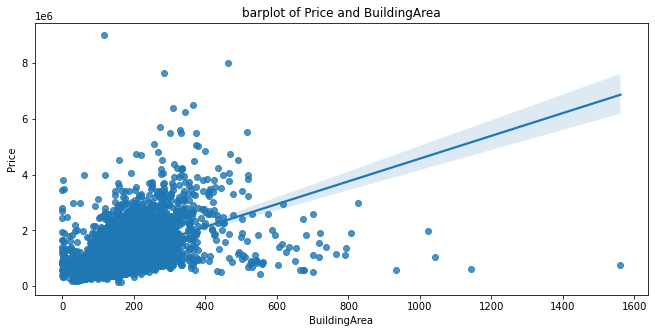

In [964]:
x = [1484,1588,2560,13245]
melbdatabuilding = melbdata.drop(x,axis=0) 
plt.figure(figsize=(11,5))
sns.regplot(x=melbdatabuilding["BuildingArea"],y=melbdatabuilding["Price"])
plt.title("barplot of Price and BuildingArea")

Text(0.5, 1.0, 'barplot of Price and YearBuilt')

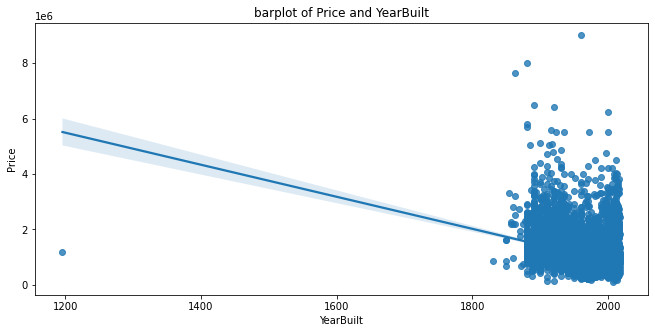

In [965]:
plt.figure(figsize=(11,5))
sns.regplot(x=melbdata["YearBuilt"],y=melbdata["Price"])
plt.title("barplot of Price and YearBuilt")

##### According to our graphs,
1.We can see Yearbuilt has a negative correlation, The Buildings that were constructed earlier are more expensive than later constructed buildings.

2.We also see that Building area has a positive correlation with the price of the Buildings (which makes sense).

3.We see that Landsize too has a positive correlation with the price.

4.We also see that the most expensive buildings are Located at the Southern Metropolitan and the cheapest are Located at the Western Metropolitan.

5.We also see that the most expensive houses have space for 5 cars.
We see that the most expensive buildingd have 5-7 Rooms and 7 bathrooms.


# Transform Data

The dataset has some useful variables such as "Type" and "Method" but will be more useful as integer values for the Regression

In [966]:
hu=pd.get_dummies(melbdata["Type"])

In [967]:
hu.head(3)

,h,t,u
0,1,0,0
1,1,0,0
2,1,0,0


In [968]:
meth=pd.get_dummies(melbdata["Method"])

In [969]:
meth.head(5)

,PI,S,SA,SP,VB
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,0,1


In [970]:
meth.head(5)

,PI,S,SA,SP,VB
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,0,1


In [971]:
melbdata["Car"] = melbdata["Car"].astype(float , errors = 'raise')

In [972]:
melbdata.tail(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,...,2,4.0,436,NaN,1997.0,NaN,-37.853,144.887,Western Metropolitan,6380
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016,...,1,5.0,866,157.0,1920.0,NaN,-37.859,144.893,Western Metropolitan,6380
13579,Yarraville,6 Agnes St,4,h,1285000,SP,Village,26/08/2017,6.3,3013,...,1,1.0,362,112.0,1920.0,NaN,-37.812,144.884,Western Metropolitan,6543


In [973]:
melbdata=pd.concat([melbdata,meth,hu],axis=1)

In [974]:
melbdata

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Regionname,Propertycount,PI,S,SA,SP,VB,h,t,u
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,Northern Metropolitan,4019,0,1,0,0,0,1,0,0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,Northern Metropolitan,4019,0,1,0,0,0,1,0,0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,Northern Metropolitan,4019,0,0,0,1,0,1,0,0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,...,Northern Metropolitan,4019,1,0,0,0,0,1,0,0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,Northern Metropolitan,4019,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,3150,...,South-Eastern Metropolitan,7392,0,1,0,0,0,1,0,0
13576,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,3016,...,Western Metropolitan,6380,0,0,0,1,0,1,0,0
13577,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,3016,...,Western Metropolitan,6380,0,1,0,0,0,1,0,0
13578,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,3016,...,Western Metropolitan,6380,1,0,0,0,0,1,0,0


In [975]:
melbdata.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 9
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
PI                  0
S                   0
SA                  0
SP                  0
VB                  0
h                   0
t                   0
u                   0
dtype: int64

## Clean Dataset

I had to drop some columns that i had no use of such as "Method" and "Type" because i already previously transformed the data.
I dropped columns such as "Address" and "SellerG" because it had no use during the regression.


In [976]:
imputdataset=melbdata.copy()

In [977]:
melbdata.drop(columns=["CouncilArea","Address","Type","Method","SellerG"],axis=1, inplace=True)

In [978]:
melbdata.isnull().sum()

Suburb              0
Rooms               0
Price               0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 9
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
PI                  0
S                   0
SA                  0
SP                  0
VB                  0
h                   0
t                   0
u                   0
dtype: int64

### Heatmap to indicate the missing values

Text(0.5, 1.0, 'Missing Data Heatmap')

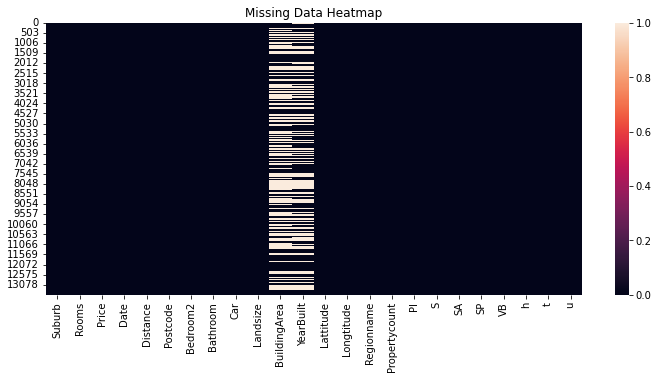

In [979]:
plt.figure(figsize=(12,5))
sns.heatmap(melbdata.isnull())
plt.title("Missing Data Heatmap")

There is missing data in the Building Area column and the Council Are column too

In [980]:
melbdata["BuildingArea"] =melbdata["BuildingArea"].fillna(method='bfill',axis=0)
melbdata["YearBuilt"] = melbdata["YearBuilt"].astype(float , errors = 'raise')
melbdata["YearBuilt"] =melbdata["YearBuilt"].fillna(method='bfill',axis=0)
melbdata["Car"] =melbdata["Car"].fillna(method='bfill',axis=0)
melbdata.head()


,Suburb,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Regionname,Propertycount,PI,S,SA,SP,VB,h,t,u
0,Abbotsford,2,1480000,3/12/2016,2.5,3067,2,1,1.0,202,...,Northern Metropolitan,4019,0,1,0,0,0,1,0,0
1,Abbotsford,2,1035000,4/2/2016,2.5,3067,2,1,1.0,156,...,Northern Metropolitan,4019,0,1,0,0,0,1,0,0
2,Abbotsford,3,1465000,4/3/2017,2.5,3067,3,2,1.0,134,...,Northern Metropolitan,4019,0,0,0,1,0,1,0,0
3,Abbotsford,3,850000,4/3/2017,2.5,3067,3,2,1.0,94,...,Northern Metropolitan,4019,1,0,0,0,0,1,0,0
4,Abbotsford,4,1600000,4/6/2016,2.5,3067,3,1,1.0,120,...,Northern Metropolitan,4019,0,0,0,0,1,1,0,0


Text(0.5, 1.0, 'Missing Data Heatmap')

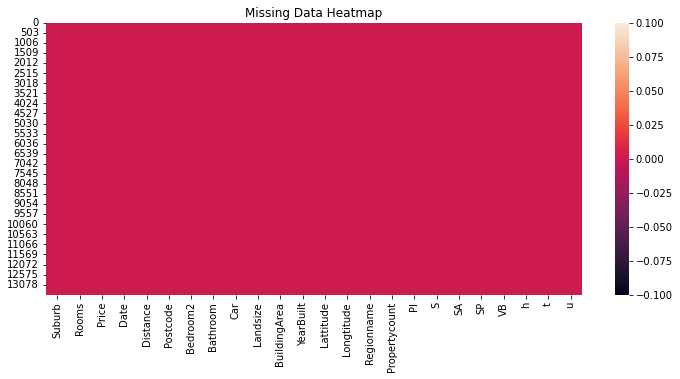

In [981]:
plt.figure(figsize=(12,5))
sns.heatmap(melbdata.isnull())
plt.title("Missing Data Heatmap")

In [982]:
melbdata.isnull().sum()

Suburb           0
Rooms            0
Price            0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
PI               0
S                0
SA               0
SP               0
VB               0
h                0
t                0
u                0
dtype: int64

No more missing data

## Train Data

In [983]:
melbdata.head(2)

,Suburb,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Regionname,Propertycount,PI,S,SA,SP,VB,h,t,u
0,Abbotsford,2,1480000,3/12/2016,2.5,3067,2,1,1.0,202,...,Northern Metropolitan,4019,0,1,0,0,0,1,0,0
1,Abbotsford,2,1035000,4/2/2016,2.5,3067,2,1,1.0,156,...,Northern Metropolitan,4019,0,1,0,0,0,1,0,0


We need to make sure all our Variables are valid for use in our models

In [984]:
features=melbdata.drop(columns=["Suburb", "Date","Regionname","Price"],axis=1)
for feat in features:
    print(feat," variable datatype is:",features[feat].dtype)

Rooms  variable datatype is: int64
Distance  variable datatype is: float64
Postcode  variable datatype is: int64
Bedroom2  variable datatype is: int64
Bathroom  variable datatype is: int64
Car  variable datatype is: float64
Landsize  variable datatype is: int64
BuildingArea  variable datatype is: float64
YearBuilt  variable datatype is: float64
Lattitude  variable datatype is: float64
Longtitude  variable datatype is: float64
Propertycount  variable datatype is: int64
PI  variable datatype is: uint8
S  variable datatype is: uint8
SA  variable datatype is: uint8
SP  variable datatype is: uint8
VB  variable datatype is: uint8
h  variable datatype is: uint8
t  variable datatype is: uint8
u  variable datatype is: uint8


In [985]:
features.tail(10)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,PI,S,SA,SP,VB,h,t,u
13570,3,14.7,3152,3,2,2.0,674,191.0,1980.0,-37.884,145.228,7082,0,1,0,0,0,1,0,0
13571,4,14.7,3152,4,2,2.0,717,191.0,1980.0,-37.869,145.221,7082,0,1,0,0,0,1,0,0
13572,2,14.5,3087,2,1,1.0,210,79.0,2006.0,-37.707,145.079,2329,1,0,0,0,0,1,0,0
13573,4,14.7,3030,4,2,1.0,662,172.0,1980.0,-37.893,144.648,16166,0,1,0,0,0,1,0,0
13574,3,16.5,3049,3,2,2.0,256,133.0,1981.0,-37.679,144.894,2474,0,1,0,0,0,1,0,0
13575,4,16.7,3150,4,2,2.0,652,133.0,1981.0,-37.906,145.168,7392,0,1,0,0,0,1,0,0
13576,3,6.8,3016,3,2,2.0,333,133.0,1995.0,-37.859,144.879,6380,0,0,0,1,0,1,0,0
13577,3,6.8,3016,3,2,4.0,436,157.0,1997.0,-37.853,144.887,6380,0,1,0,0,0,1,0,0
13578,4,6.8,3016,4,1,5.0,866,157.0,1920.0,-37.859,144.893,6380,1,0,0,0,0,1,0,0
13579,4,6.3,3013,4,1,1.0,362,112.0,1920.0,-37.812,144.884,6543,0,0,0,1,0,1,0,0


In [986]:
X=features
y=melbdata["Price"]

Separate the train and test dataset

Set the testsize to 0.2 for better Result

In [987]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Fit the Linear Regression model

Fit the data

Predict using the Linear Regression model


In [988]:
from sklearn.linear_model import LinearRegression
lgmodel=LinearRegression()
lgmodel.fit(X_train,y_train)
lgpreds=lgmodel.predict(X_test)

Get the Mean Absolute Error of the Linear Regression Model

In [989]:
from sklearn.metrics import mean_absolute_error
lgmerror=mean_absolute_error(y_test,lgpreds)
lgmerror

273985.33795985946

Fit the Random Forest model

Fit the data

Predict using the Random Forest model

In [990]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor(n_estimators=16,random_state=0)
rfmodel.fit(X_train,y_train)
rfpreds=rfmodel.predict(X_test)

Get the Mean Absolute Error of the Random Forest Model

In [991]:
rfmerror=mean_absolute_error(y_test,rfpreds)
rfmerror

169065.72688850024

In [992]:
print("The Mean Absolute Error of the Linear Regression Model is: ",lgmerror.round())
print("The Mean Absolute Error of the Random Forest Model is: ",rfmerror.round())

The Mean Absolute Error of the Linear Regression Model is:  273985.0
The Mean Absolute Error of the Random Forest Model is:  169066.0


In [993]:
l2_score = lgmodel.score(X,y)
l2_score

0.5669299639075716

In [994]:
r2_score = rfmodel.score(X,y)
r2_score

0.933476465607765

The Random Forest Model is the better model for this problem with the lesser mean_absolute_error and a higher score

I believe the Random Forest Model performed better because because there is high non-linearity and a more complex relationship between the dependent and independent variables in the Data.

Remember that a Random Forest model can be used for both Regression and Classification problems.

### Thank you

In [995]:
y_test

8505     2165000
5523      815000
12852     610000
4818     1245000
12812    1160000
          ...   
2664      305000
8513     1412000
12922    1230000
10761    1270000
2110     1000000
Name: Price, Length: 2716, dtype: int64

In [996]:
lgpreds

array([1578157.0607762 , 1033953.79099408,  690194.7962665 , ...,
       1114049.63135669, 1357613.07057309, 1337705.43581492])

In [997]:
rfpreds

array([1851555.5 ,  831075.  ,  687656.25, ..., 1381312.5 , 1249149.25,
       1197968.75])